<a href="https://colab.research.google.com/github/JinnnnyHong/Bigdata_processing/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train_dataset_with_label_fill_user_mean.csv')
df = pd.DataFrame(df)

In [6]:
cols_group1 = list(range(1, 27)) + [-1]
df_activity = df.iloc[:, cols_group1]

# 1, 2번째 열과 26번째부터 마지막 열을 포함한 그룹 묶기
cols_group2 = [1, 2] + list(range(26, df.shape[1]))
df_sleep = df.iloc[:, cols_group2]

df_sleep.to_csv('sleep.csv', index=False)
df_activity.to_csv('activity.csv', index = False)

In [8]:
sleep = pd.DataFrame(df_sleep)
activity = pd.DataFrame(df_activity)

In [29]:
df_sleep_CN = sleep.loc[sleep['DIAG_NM'] == 'CN']
# DEM에 해당하는 데이터 추출
df_sleep_DEM = sleep.loc[sleep['DIAG_NM'] == 'DEM']
# MCI에 해당하는 데이터 추출
df_sleep_MCI = sleep.loc[sleep['DIAG_NM'] == 'MCI']

In [26]:
x = sleep[['sleep_breath_average','sleep_hr_average', 'sleep_rem', 'sleep_hr_average','sleep_midpoint_at_delta', 'sleep_restless', 'sleep_light']]
y_CN = df_sleep_CN.loc[df_sleep_CN['DIAG_NM'] == 'CN'].iloc[:, -1]
y_DEM = df_sleep_DEM.loc[df_sleep_DEM['DIAG_NM'] == 'DEM'].iloc[:, -1]
y_MCI = df_sleep_MCI.loc[df_sleep_MCI['DIAG_NM'] == 'MCI'].iloc[:, -1]


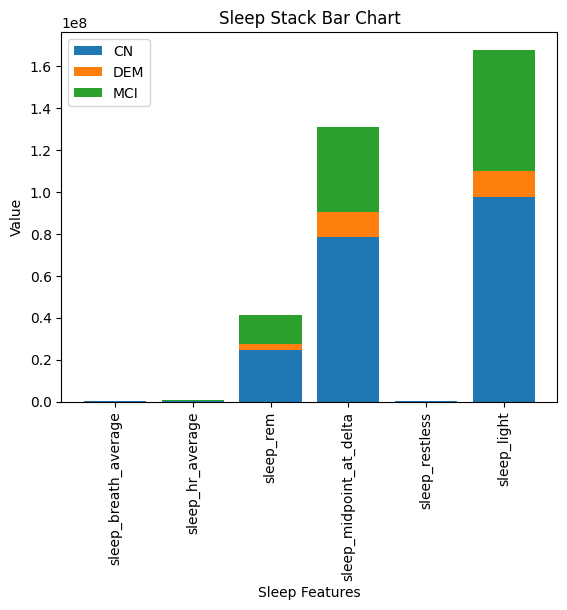

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# sleep 데이터 프레임 불러오기
df_sleep = pd.read_csv('sleep.csv')

# DIAG_NM 기준으로 그룹화하여 CN, DEM, MCI에 해당하는 데이터프레임 추출
df_grouped = df_sleep.groupby('DIAG_NM')
df_CN = df_grouped.get_group('CN')[['sleep_breath_average', 'sleep_hr_average', 'sleep_rem', 'sleep_midpoint_at_delta', 'sleep_restless', 'sleep_light']].sum()
df_DEM = df_grouped.get_group('Dem')[['sleep_breath_average', 'sleep_hr_average', 'sleep_rem', 'sleep_midpoint_at_delta', 'sleep_restless', 'sleep_light']].sum()
df_MCI = df_grouped.get_group('MCI')[['sleep_breath_average', 'sleep_hr_average', 'sleep_rem', 'sleep_midpoint_at_delta', 'sleep_restless', 'sleep_light']].sum()

# 스택 바 차트 그리기
x = df_CN.index
y_CN = df_CN.values
y_DEM = df_DEM.values
y_MCI = df_MCI.values

plt.bar(x, y_CN, label='CN')
plt.bar(x, y_DEM, bottom=y_CN, label='DEM')
plt.bar(x, y_MCI, bottom=y_CN+y_DEM, label='MCI')



plt.xticks(rotation=90)
plt.xlabel('Sleep Features')
plt.ylabel('Value')
plt.title('Sleep Stack Bar Chart')
plt.legend()

plt.show()


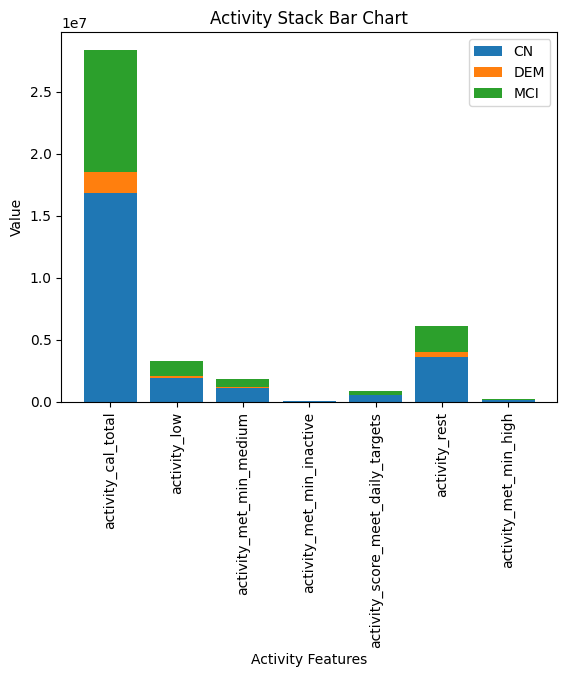

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# activity 데이터 프레임 불러오기
df_activity = pd.read_csv('activity.csv')

# DIAG_NM 기준으로 그룹화하여 CN, DEM, MCI에 해당하는 데이터프레임 추출
df_grouped = df_activity.groupby('DIAG_NM')
df_CN = df_grouped.get_group('CN')[['activity_cal_total', 'activity_low', 'activity_met_min_medium', 'activity_met_min_inactive', 'activity_score_meet_daily_targets', 'activity_rest', 'activity_met_min_high']].sum()
df_DEM = df_grouped.get_group('Dem')[['activity_cal_total', 'activity_low', 'activity_met_min_medium', 'activity_met_min_inactive', 'activity_score_meet_daily_targets', 'activity_rest', 'activity_met_min_high']].sum()
df_MCI = df_grouped.get_group('MCI')[['activity_cal_total', 'activity_low', 'activity_met_min_medium', 'activity_met_min_inactive', 'activity_score_meet_daily_targets', 'activity_rest', 'activity_met_min_high']].sum()

# 스택 바 차트 그리기
x = df_CN.index
y_CN = df_CN.values
y_DEM = df_DEM.values
y_MCI = df_MCI.values

plt.bar(x, y_CN, label='CN')
plt.bar(x, y_DEM, bottom=y_CN, label='DEM')
plt.bar(x, y_MCI, bottom=y_CN+y_DEM, label='MCI')



plt.xticks(rotation=90)
plt.xlabel('Activity Features')
plt.ylabel('Value')
plt.title('Activity Stack Bar Chart')
plt.legend()

plt.show()